# Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing the DataSet

In [2]:
df = pd.read_csv('adult.csv')
df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [3]:
df = df.rename(columns={'fnlwgt': 'final-wt'})


In [5]:
df.head(2)

,age,workclass,final-wt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [129]:
df.describe()

,age,final-wt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# EDA

In [4]:
# Separating categorical and numerical features
cat_data = df.select_dtypes(exclude=[np.number, np.datetime64])
num_data = df.select_dtypes(exclude=[np.object, np.datetime64])


## Univariate Analysis

### Histograms for Numerical variables

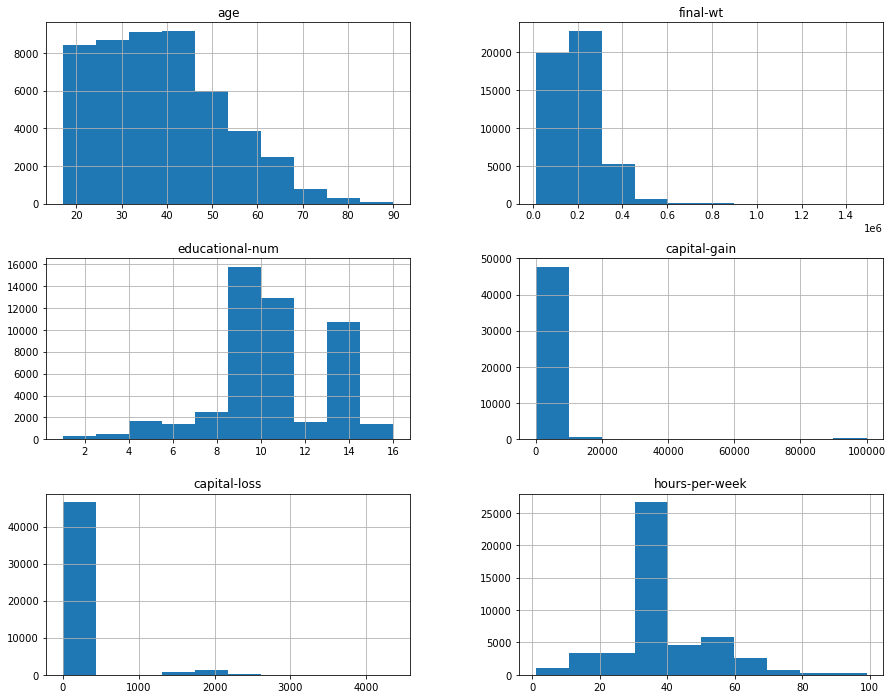

In [8]:
# Plotting histograms for numerical variables.
subset = df[num_data.columns]
subset.hist(figsize=(15,12))
plt.show()

**Observation**:
- People generally spend 30-40 hrs per week on their work.
- And majority of people has the age of 35 - 45 yrs.

### Boxplots for Numerical Variables

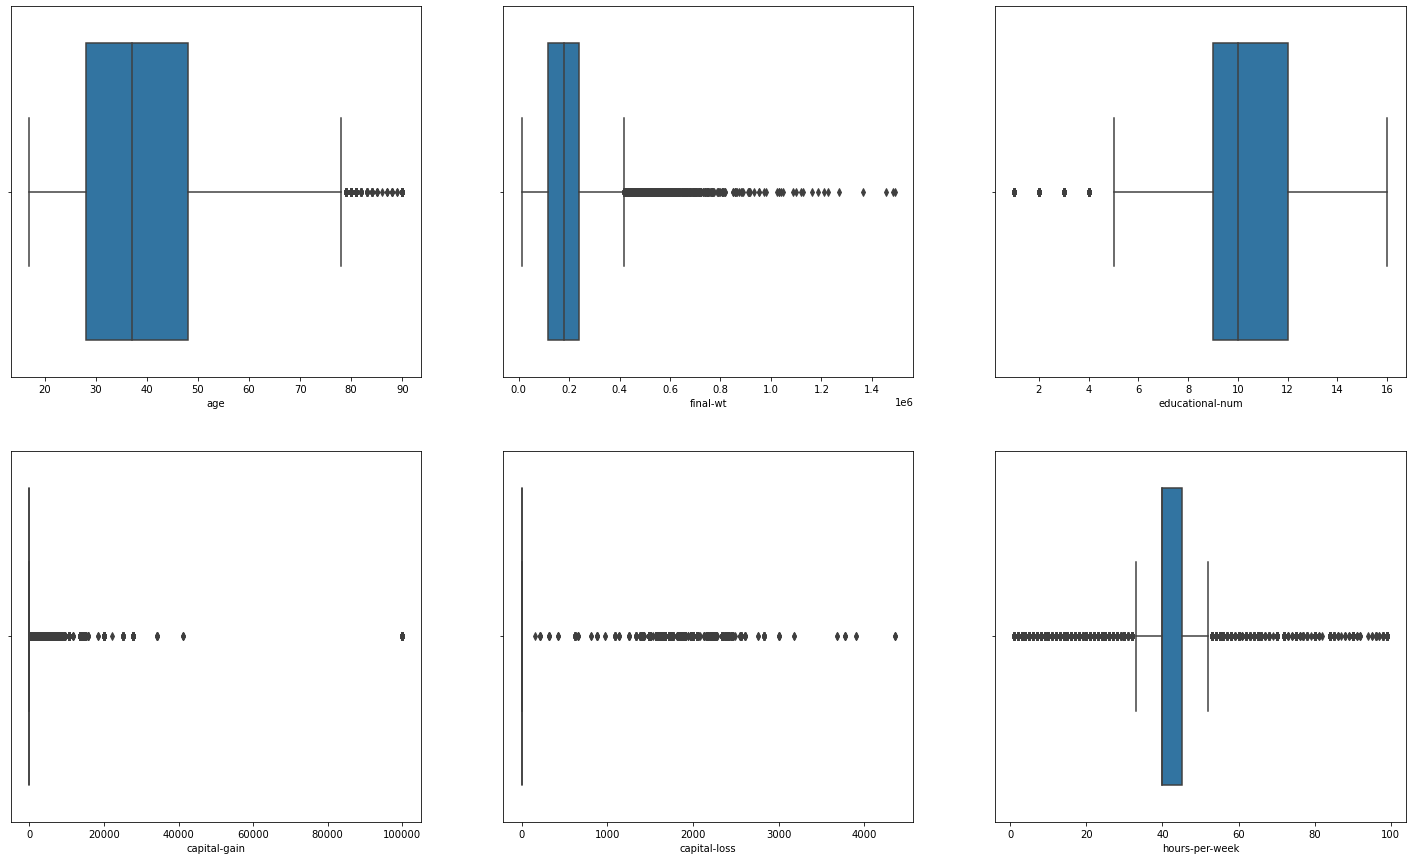

In [5]:

plt.subplots(figsize=(25, 15))
count = 1
for i in num_data.columns:
    plt.subplot(2, 3, count)
    sns.boxplot(x=df[i])
    count += 1
plt.show()

**Observation**:
- Their are outliers in the dataset.
- 75% of people's age lie below 48 yrs, capital-gain & loss are 0 and hours spent per week is below 45.
- 25% of people's age are below 28 yrs, and hours spent per week is below 40.

### Categorical Variables

In [31]:
cat_data.head(3)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K


### Frequency distribution of Categorical variables

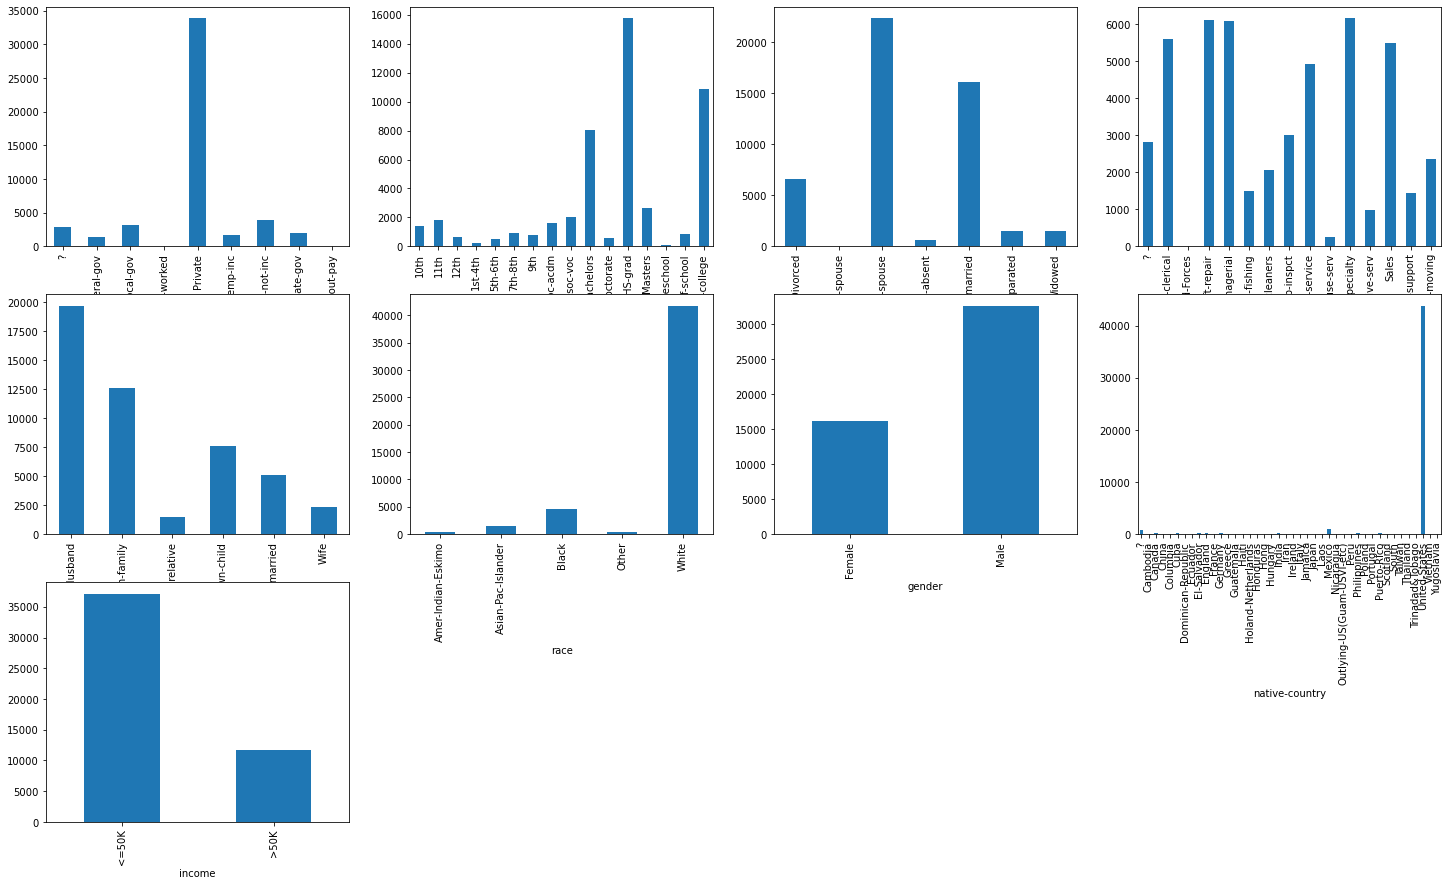

In [6]:
count = 1
plt.subplots(figsize=(25, 15))
for i in cat_data.columns:
    plt.subplot(3,4,count)
    cat_data.groupby(i).size().plot.bar()
    count +=1

plt.show()
    


**Observation**:
- Number of people working in *private* sector is highest.
- Majority are HS-graduates, and has some college degree.
- majority of them are either married with a civilian spouce or unmarried.
- There are more number of white people. Location of data collection might be one of the main reason for this variation.
- There are more number of males than females. This hints the preference of job categories based on gender.
- Nearly all the candidates are from US. This highlights the reason behind more number of whites than other races.
- And majority of people has salary less than 50 thousands.

### Heatmap

<AxesSubplot:>

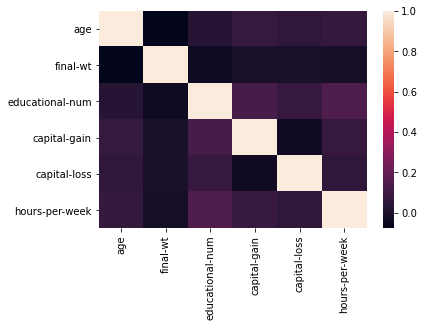

In [134]:
sns.heatmap(data=num_data.corr())

## Bivariate Analysis

### Pairplot

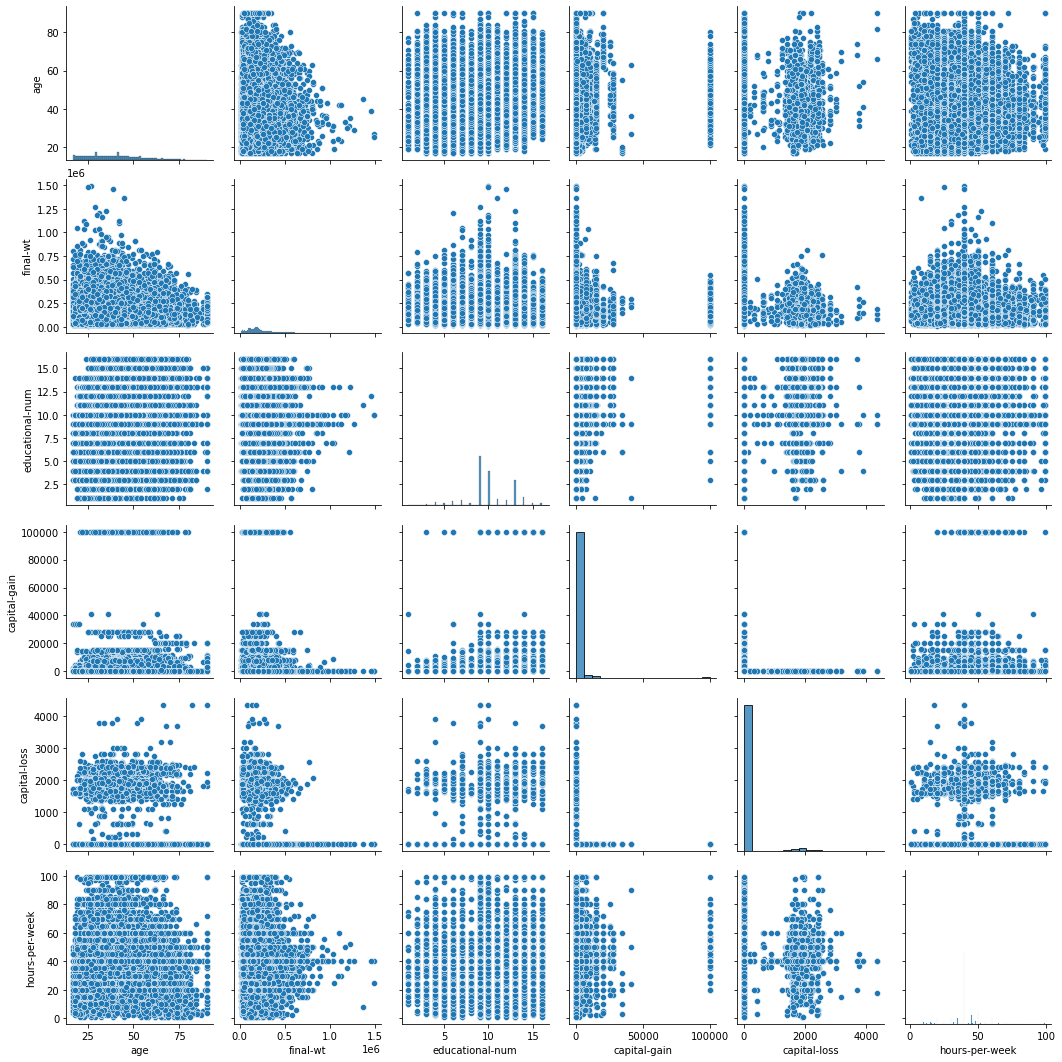

In [157]:
sns.pairplot(df[df.columns])


### Bar plot

In [33]:
print(cat_data.shape , num_data.shape)

(48842, 9) (48842, 6)


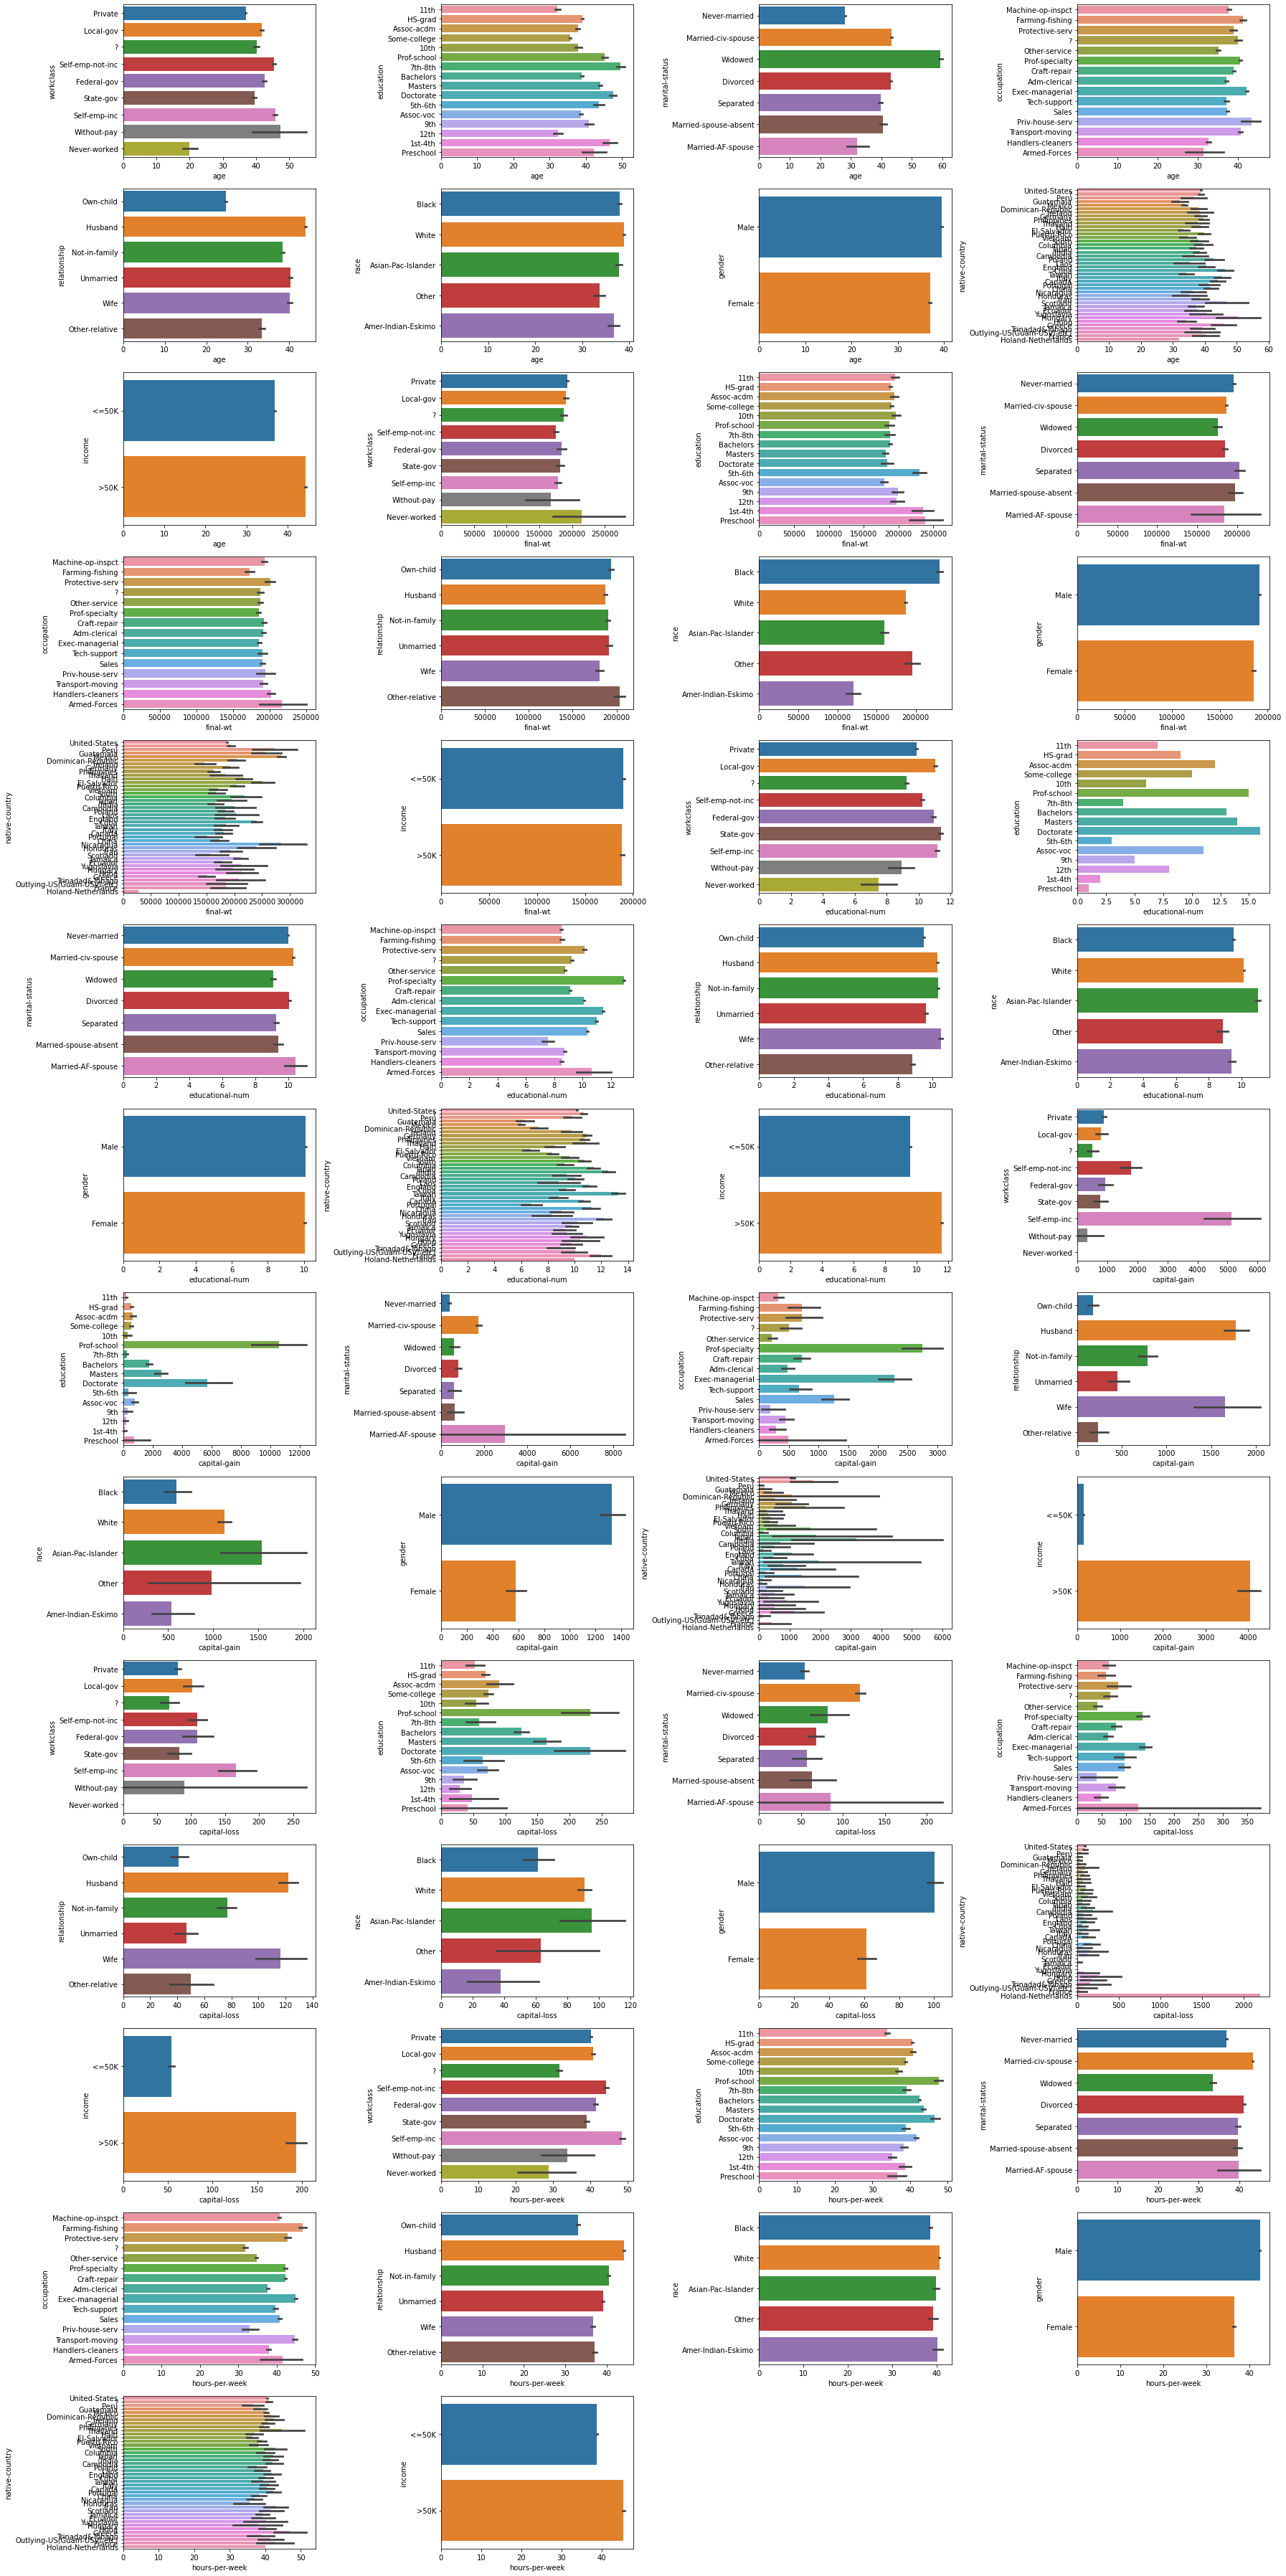

In [40]:
plt.subplots(figsize=(25, 50))
count = 1 
for i in num_data.columns:   
    for j in cat_data.columns:
        plt.subplot(14, 4, count)
        sns.barplot(data=df, y=cat_data[j], x=num_data[i])
        count += 1
plt.show()


**Observation**:
- Male work more per week compared to female.
- People who work more hours make more money.
- People who are self employed, work more compared to other workclasses.
  

# Data Preprocessing

### Removing outliers and missing values of Numerical Features

IQR

In [26]:
def remove_outlier_IQR(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) -
                 np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (
        iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(
        df[field_name], 25) - iqr)].index, inplace=True)
    return df

In [27]:
# Removing ouliers from final-wt feature
df2 = remove_outlier_IQR(df,'final-wt')
df_final = remove_outlier_IQR(df2, 'hours-per-week')
df_final.shape


(36312, 15)

Boxplot

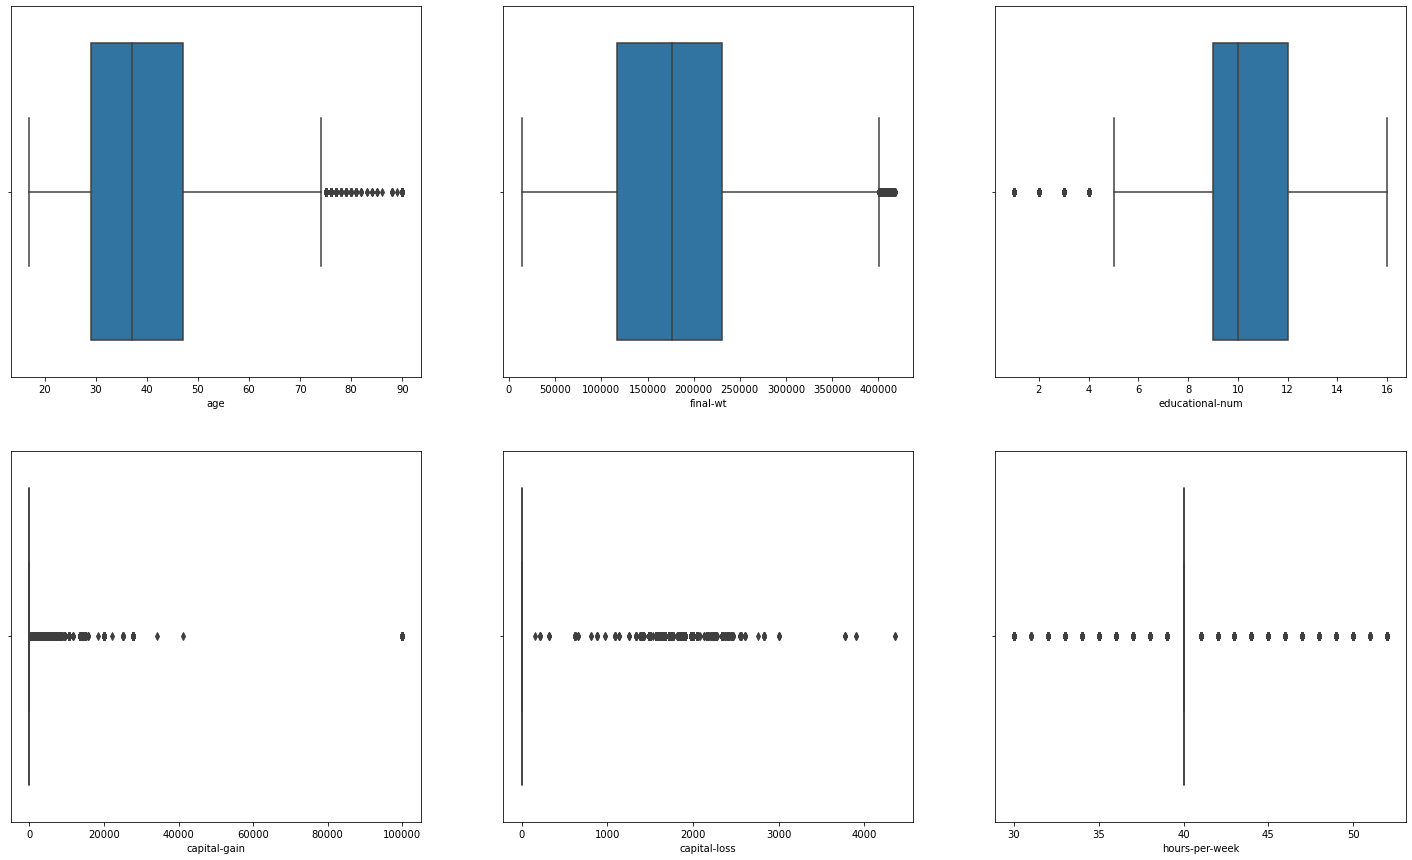

In [28]:

plt.subplots(figsize=(25, 15))
count = 1
for i in num_data.columns:
    plt.subplot(2, 3, count)
    sns.boxplot(x=df_final[i])
    count += 1
plt.show()

### Dealing with Categorical features

In [29]:

df_final = df_final.replace({'?': 'unknown'})


In [30]:
cat_df = df_final.select_dtypes(exclude=[np.number, np.datetime64])
num_df = df_final.select_dtypes(exclude=[np.object, np.datetime64])


In [31]:
cat_df.head()


,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,unknown,Some-college,Never-married,unknown,Own-child,White,Female,United-States,<=50K


In [32]:
cat_df = pd.get_dummies(cat_df)
cat_df.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_unknown,education_10th,...,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_unknown,income_<=50K,income_>50K
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


### Data preparation for training

In [33]:
data = pd.concat([cat_df,num_df],axis=1)
data.shape

(36312, 110)

### Splitting the dataset for training

In [34]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['income_<=50K', 'income_>50K'])
y = data['income_<=50K']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
print("X train shape: {} and y train shape: {}".format(
    X_train.shape, y_train.shape))
print("X test shape: {} and y test shape: {}".format(X_test.shape, y_test.shape))


X train shape: (25418, 108) and y train shape: (25418,)
X test shape: (10894, 108) and y test shape: (10894,)


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X1 = data.drop(columns=['income_<=50K', 'income_>50K'])
y1 = data['income_<=50K']

# Scaling the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X1)

X1_train, X1_test, y1_train, y1_test = train_test_split(
    scaled_df, y1, test_size=0.3)
print("X1 train shape: {} and y1 train shape: {}".format(
    X1_train.shape, y1_train.shape))
print("X1 test shape: {} and y1 test shape: {}".format(X1_test.shape, y1_test.shape))


X1 train shape: (25418, 108) and y1 train shape: (25418,)
X1 test shape: (10894, 108) and y1 test shape: (10894,)


# Model Training

## Random Forest Classifier

In [36]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(random_state=10)
rfm.fit(X_train, y_train)
y_pred = rfm.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.63      0.67      2660
           1       0.89      0.92      0.90      8234

    accuracy                           0.85     10894
   macro avg       0.80      0.77      0.79     10894
weighted avg       0.84      0.85      0.84     10894

[[1678  982]
 [ 673 7561]]
0.8480815127593171


In [37]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(random_state=10)
rfm.fit(X1_train, y1_train)
y1_pred = rfm.predict(X1_test)

print(metrics.classification_report(y1_test, y1_pred))
print(metrics.confusion_matrix(y1_test, y1_pred))
print(metrics.accuracy_score(y1_test, y1_pred))


              precision    recall  f1-score   support

           0       0.71      0.62      0.66      2649
           1       0.88      0.92      0.90      8245

    accuracy                           0.85     10894
   macro avg       0.80      0.77      0.78     10894
weighted avg       0.84      0.85      0.84     10894

[[1641 1008]
 [ 673 7572]]
0.8456948779144483


## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.72      0.25      0.37      2660
           1       0.80      0.97      0.88      8234

    accuracy                           0.79     10894
   macro avg       0.76      0.61      0.62     10894
weighted avg       0.78      0.79      0.75     10894

[[ 671 1989]
 [ 261 7973]]
0.7934642922709748


In [39]:

logmodel = LogisticRegression()
logmodel.fit(X1_train, y1_train)
predictions = logmodel.predict(X1_test)
print(metrics.classification_report(y1_test, predictions))
print(metrics.confusion_matrix(y1_test, predictions))
print(metrics.accuracy_score(y1_test, predictions))


              precision    recall  f1-score   support

           0       0.72      0.59      0.65      2649
           1       0.88      0.93      0.90      8245

    accuracy                           0.85     10894
   macro avg       0.80      0.76      0.78     10894
weighted avg       0.84      0.85      0.84     10894

[[1559 1090]
 [ 593 7652]]
0.8455112906186892


## Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.64      0.30      0.41      2660
           1       0.81      0.95      0.87      8234

    accuracy                           0.79     10894
   macro avg       0.72      0.62      0.64     10894
weighted avg       0.77      0.79      0.76     10894

[[ 807 1853]
 [ 451 7783]]
0.7885074352854783


In [41]:
model = GaussianNB()
model.fit(X1_train, y1_train)
predictions = model.predict(X1_test)
print(metrics.classification_report(y1_test, predictions))
print(metrics.confusion_matrix(y1_test, predictions))
print(metrics.accuracy_score(y1_test, predictions))


              precision    recall  f1-score   support

           0       0.32      0.96      0.49      2649
           1       0.96      0.36      0.52      8245

    accuracy                           0.51     10894
   macro avg       0.64      0.66      0.50     10894
weighted avg       0.81      0.51      0.51     10894

[[2540  109]
 [5278 2967]]
0.505507618872774


## Support Vector Machine (SVM)

In [42]:
from sklearn import svm
clf = svm.SVC(gamma='auto')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.42      0.07      0.12      2660
           1       0.76      0.97      0.85      8234

    accuracy                           0.75     10894
   macro avg       0.59      0.52      0.49     10894
weighted avg       0.68      0.75      0.68     10894

[[ 194 2466]
 [ 268 7966]]
0.7490361666972646


## K-Nearest Neighbours

In [47]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_test)
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.60      0.28      0.39      2660
           1       0.80      0.94      0.87      8234

    accuracy                           0.78     10894
   macro avg       0.70      0.61      0.63     10894
weighted avg       0.75      0.78      0.75     10894

[[ 753 1907]
 [ 492 7742]]
0.7797870387369195


In [48]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X1_train, y1_train)
predictions = KNN.predict(X1_test)
print(metrics.classification_report(y1_test, predictions))
print(metrics.confusion_matrix(y1_test, predictions))
print(metrics.accuracy_score(y1_test, predictions))


              precision    recall  f1-score   support

           0       0.66      0.56      0.60      2649
           1       0.86      0.91      0.89      8245

    accuracy                           0.82     10894
   macro avg       0.76      0.73      0.74     10894
weighted avg       0.81      0.82      0.82     10894

[[1475 1174]
 [ 765 7480]]
0.8220121167615201
